# Helping to generate templates for the spectrographs

### See core.wavecal.templates.py for polished versions

    452 grism for Kastb

In [33]:
%matplotlib inline

In [28]:
# imports
from pkg_resources import resource_filename
from importlib import reload
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.io import readsav 

from astropy import units
from astropy.table import Table

from linetools import utils as ltu
from linetools.spectra import xspectrum1d as xspec

from pypeit import utils
from pypeit.core.wave import airtovac
from pypeit.core.wavecal import waveio
from pypeit.core.wavecal import autoid
from pypeit.core.wavecal import templates, qa
from pypeit.spectrographs import util

## Keck/LRISb

### 400/3400

#### Load

In [30]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/lris_blue_400_d560.sav'

In [31]:
xidl_dict = readsav(xidl_file)

In [32]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(21, 2048)

In [33]:
xidl_dict['calib']['FUNC']

array([b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY',
       b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY',
       b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY', b'CHEBY',
       b'CHEBY', b'CHEBY', b'CHEBY'], dtype=object)

#### Find em

In [54]:
slit = 19 # blue;  ends at 5510
slit = 14 # very red
calib = xidl_dict['calib'][slit]
wv_air = templates.cheby_val(calib['FFIT'], np.arange(npix),
                       calib['NRM'], calib['NORD'])
wv_vac = airtovac(wv_air*units.AA)

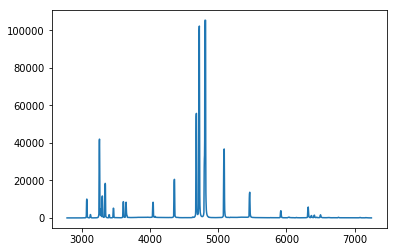

In [55]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

### 1200/3400

#### Load

In [110]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/lris_blue_1200.sav'
xidl_dict = readsav(xidl_file)

In [111]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(46, 2048)

In [60]:
xidl_dict['calib']['FUNC'][0]

b'CHEBY'

#### Find em

In [89]:
slit = 19 # blue
slit = 7 # red
slit = 40 # super blue
slit = 44 # reddest
calib = xidl_dict['calib'][slit]
wv_air = templates.cheby_val(calib['FFIT'], np.arange(npix),
                       calib['NRM'], calib['NORD'])
wv_vac = airtovac(wv_air*units.AA)

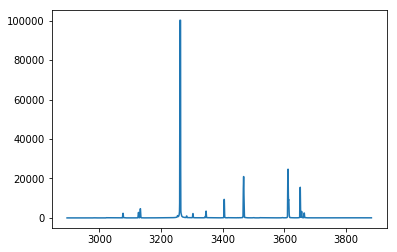

In [90]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

----

## Shane Kastb

### 452/3306

#### Load

In [92]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/kast_452_3306.sav'
xidl_dict = readsav(xidl_file)

In [98]:
npix = xidl_dict['archive_arc'].shape
npix

(2048,)

In [121]:
reload(templates)
calib = xidl_dict['calib'][0]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)

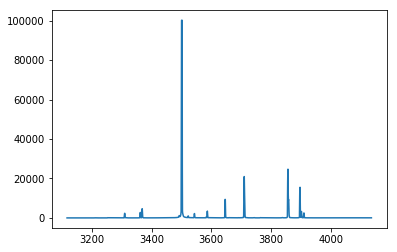

In [122]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

### 600/4310

#### Load

In [148]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/kast_600_4310.sav'
xidl_dict = readsav(xidl_file)

In [149]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(4, 2048)

In [150]:
xidl_dict['calib']['FUNC']

array([b'POLY', b'POLY', b'POLY', b'POLY'], dtype=object)

#### Check em

In [153]:
# Standard
slit = 0 # central
#slit = 3 # red
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)

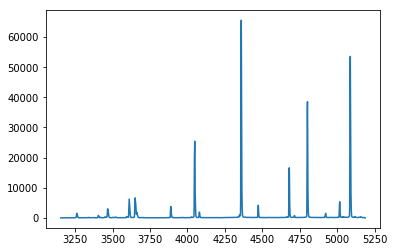

In [154]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

### 830/3460

#### Load

In [155]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/kast_830_3460.sav'
xidl_dict = readsav(xidl_file)

In [156]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(2, 2048)

In [157]:
xidl_dict['calib']['FUNC']

array([b'POLY', b'POLY'], dtype=object)

#### Check em

In [168]:
# Standard
slit = 0 # bluer (not very blue)
#slit = 1 # a little redder
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)
wv_vac[0]

<Quantity 3272.08285988 Angstrom>

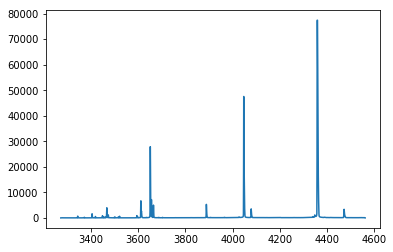

In [169]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

----

## Keck/DEIMOS

### 600

#### Load

In [171]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/deimos_600.sav'
xidl_dict = readsav(xidl_file)

In [172]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(2, 4096)

In [173]:
xidl_dict['calib']['FUNC']

array([b'POLY', b'POLY'], dtype=object)

#### Check em

In [186]:
# Standard
slit = 0 # blue chip
#slit = 1 # red chip
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)
wv_vac[0], wv_vac[-1]

(<Quantity 4607.10556396 Angstrom>, <Quantity 7192.8248653 Angstrom>)

<IPython.core.display.Javascript object>


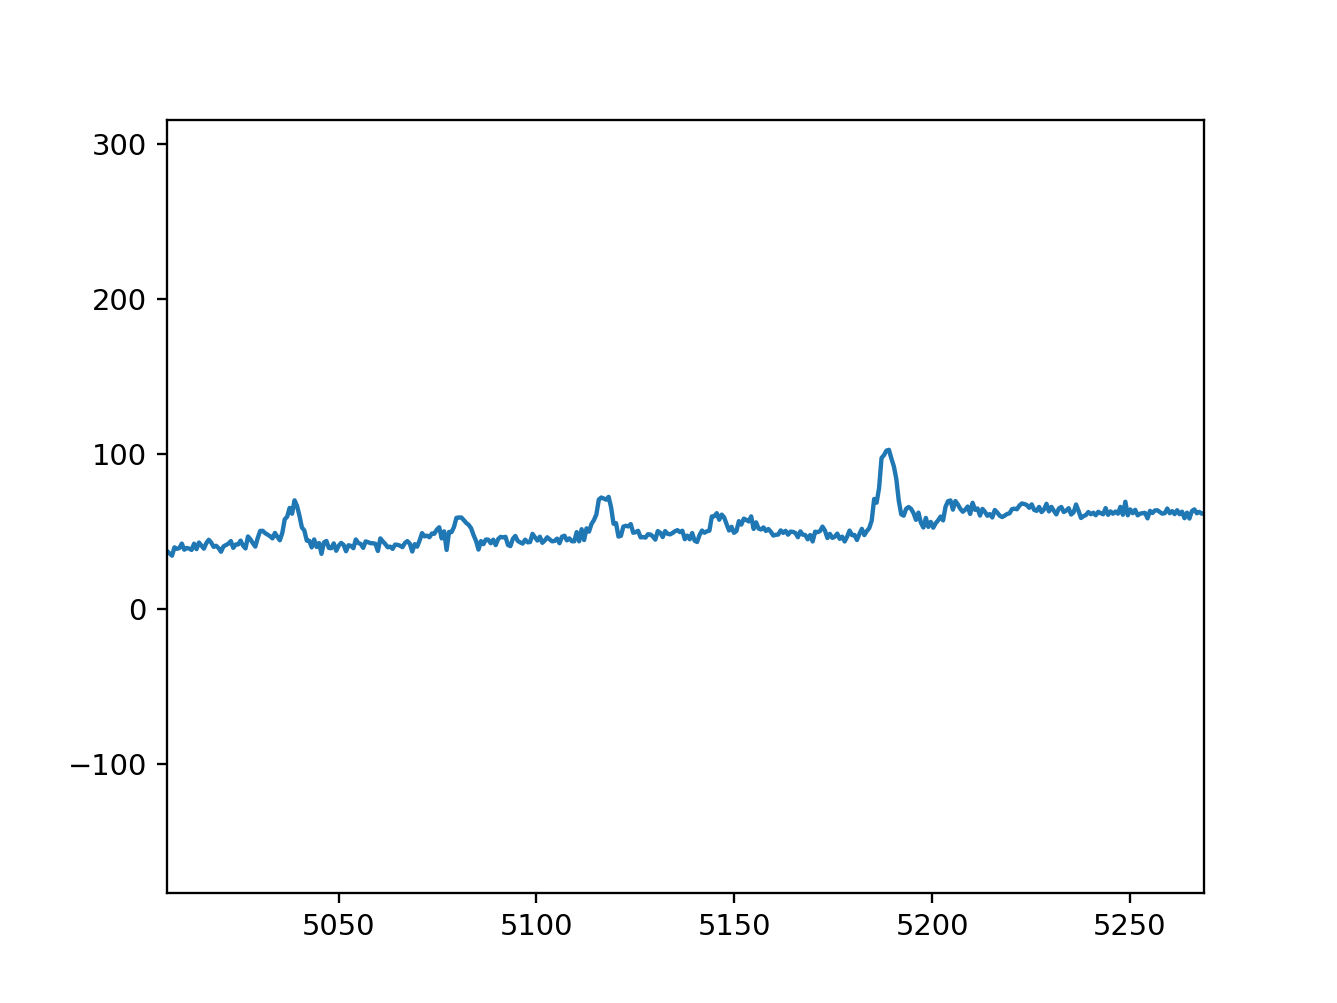

In [188]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

### Check 830G

In [192]:
outpath=resource_filename('pypeit', 'data/arc_lines/reid_arxiv')
outroot='keck_deimos_830G.fits'
outfile = os.path.join(outpath, outroot)

In [193]:
tbl = Table.read(outfile)

<IPython.core.display.Javascript object>


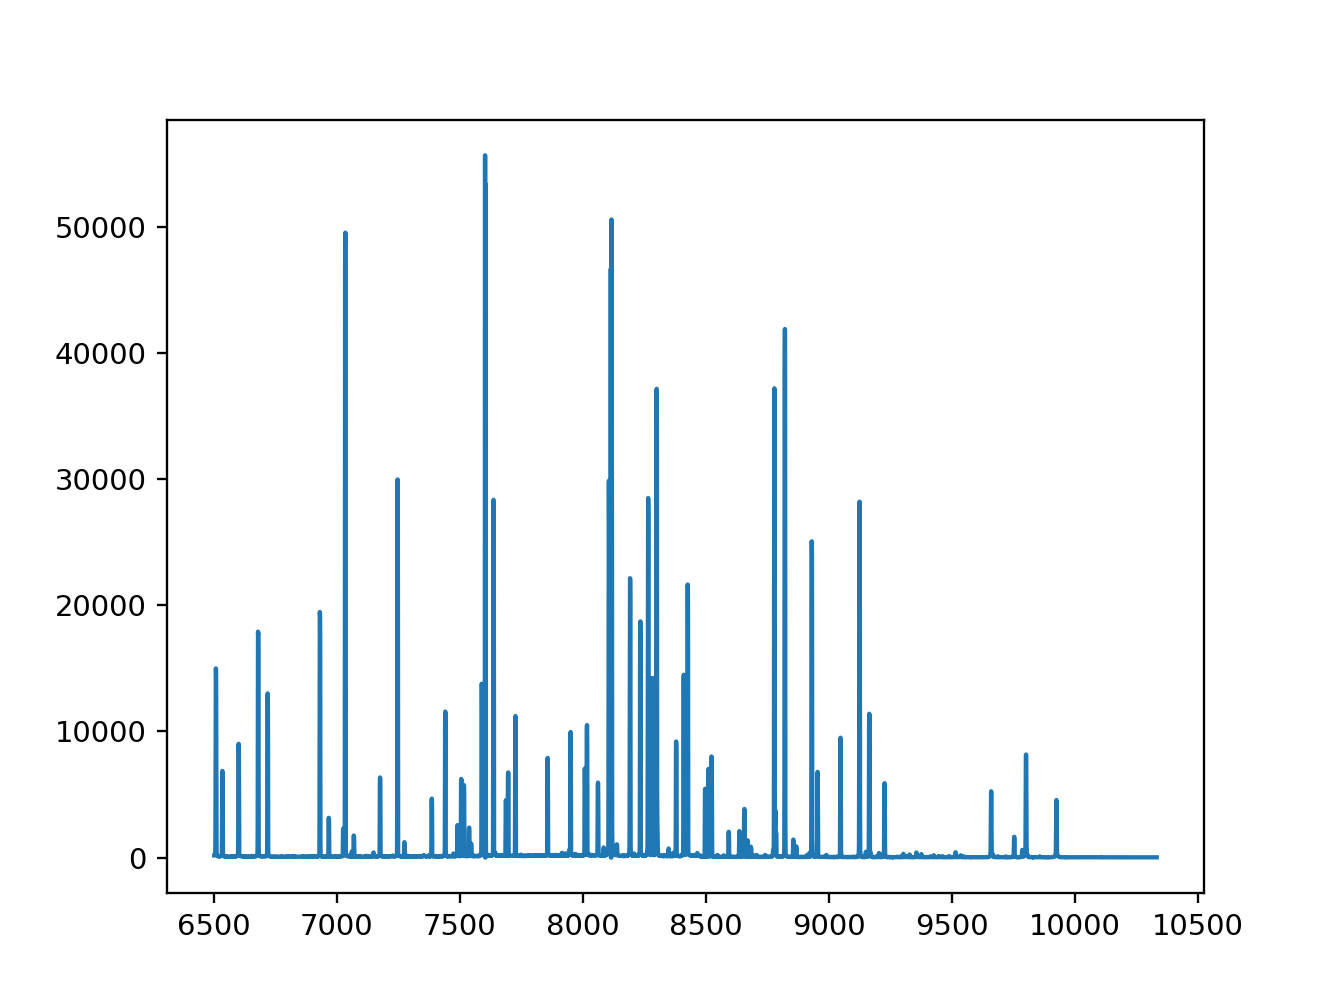

In [195]:
plt.clf()
ax = plt.gca()
ax.plot(tbl['wave'], tbl['flux'])
plt.show()

### 1200

In [5]:
mwv_file = os.path.join(os.getenv('PYPEIT_DEV'), 'dev_algorithms/wavelengths/template_files/Keck_DEIMOS/1200G', 
                        'MasterWaveCalib_A_1_07b.json')

In [6]:
wv_vac, spec = templates.pypeit_arcspec(mwv_file, 0)

<IPython.core.display.Javascript object>


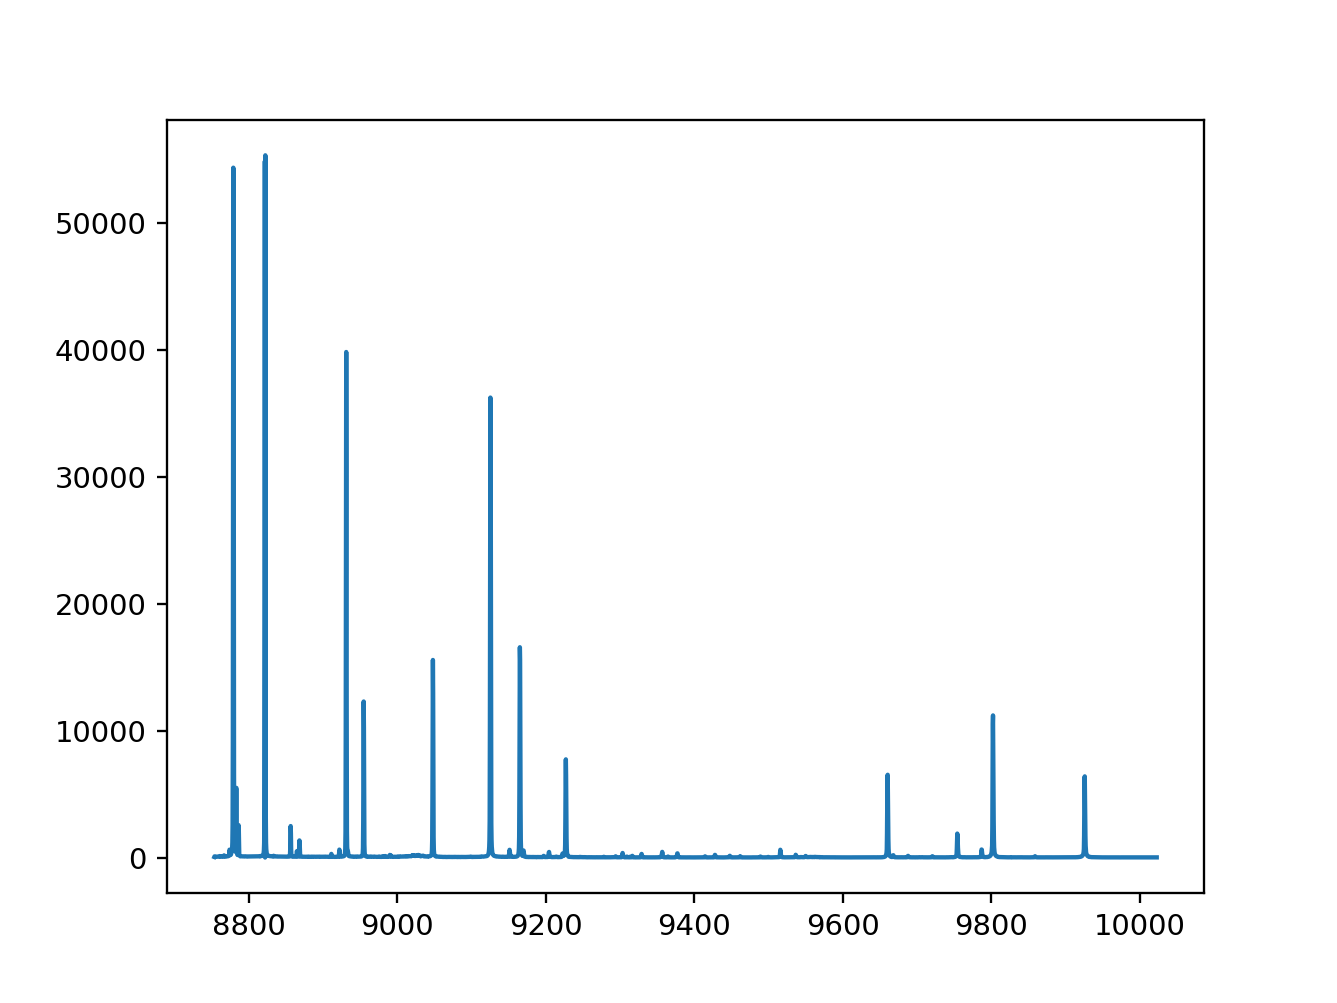

In [7]:
plt.clf()
ax = plt.gca()
ax.plot(wv_vac, spec)
plt.show()

In [9]:
keck_deimos = util.load_spectrograph('keck_deimos')

In [10]:
par = keck_deimos.default_pypeit_par()

In [16]:
par['calibrations']['wavelengths']

Parameter         Value               Default        Type                       Callable
----------------------------------------------------------------------------------------
reference         arc                 arc            str                        False   
method            holy-grail          holy-grail     str                        False   
echelle           False               False          bool                       False   
ech_fix_format    True                True           bool                       False   
ech_nspec_coeff   4                   4              int                        False   
ech_norder_coeff  4                   4              int                        False   
ech_sigrej        2.0                 2.0            int, float                 False   
lamps             ArI, NeI, KrI, XeI  None           list                       False   
nonlinear_counts  56360.1             10000000000.0  float                      False   
sigdetect         5.0

#### Try running

In [21]:
ok_mask = np.array([0])
det = 7
binspec = 1
templ_dict = dict(wave=wv_vac, spec=spec, bin=1)

In [26]:
reload(autoid)
wv_calib = autoid.full_template(spec, par['calibrations']['wavelengths'], ok_mask, det, binspec,
                               template_dict=templ_dict)

[INFO]    :: autoid.py 680 full_template() - Processing slit 0
[INFO]    :: autoid.py 693 full_template() - Shift = -1.3642420526593924e-12; cc = 0.9999999999999776
[INFO]    :: autoid.py 483 reidentify() - Cross-correlating with arxiv slit # 0
[INFO]    :: autoid.py 483 reidentify() - Cross-correlating with arxiv slit # 0


In [27]:
wv_calib

{'0': {'cen_disp': 0.3108942149410723,
  'cen_wave': 9400.409290344052,
  'fitc': array([ 9.39618192e+03,  6.35420822e+02, -8.09115674e+00, -7.26916863e-01,
          7.02659367e-02,  2.38440448e-02]),
  'fmax': 1.0,
  'fmin': 0.0,
  'function': 'legendre',
  'ions': array(['KrI', 'KrI', 'XeI', 'XeI', 'ArI', 'XeI', 'ArI', 'NeI', 'ArI',
         'ArI', 'ArI', 'NeI', 'ArI', 'KrI', 'ArI', 'XeI', 'XeI'],
        dtype='<U6'),
  'mask': array([ True,  True,  True,  True,  True,  True,  True, False,  True,
          True,  True,  True,  True,  True,  True,  True,  True]),
  'nrej': 3.0,
  'nspec': 4096,
  'pixel_fit': array([  80.42604643,  557.05087819,  631.18308594,  925.1334279 ,
         1170.4407947 , 1296.33770281, 1398.04054643, 1420.79381134,
         1493.07680483, 1707.08074939, 1907.91466792, 2488.4990218 ,
         2891.61825377, 3200.41915307, 3308.52758597, 3358.78719228,
         3769.66604113]),
  'rms': 0.026632510356509972,
  'shift': 0.0,
  'spec': array([43.82331828, 91.

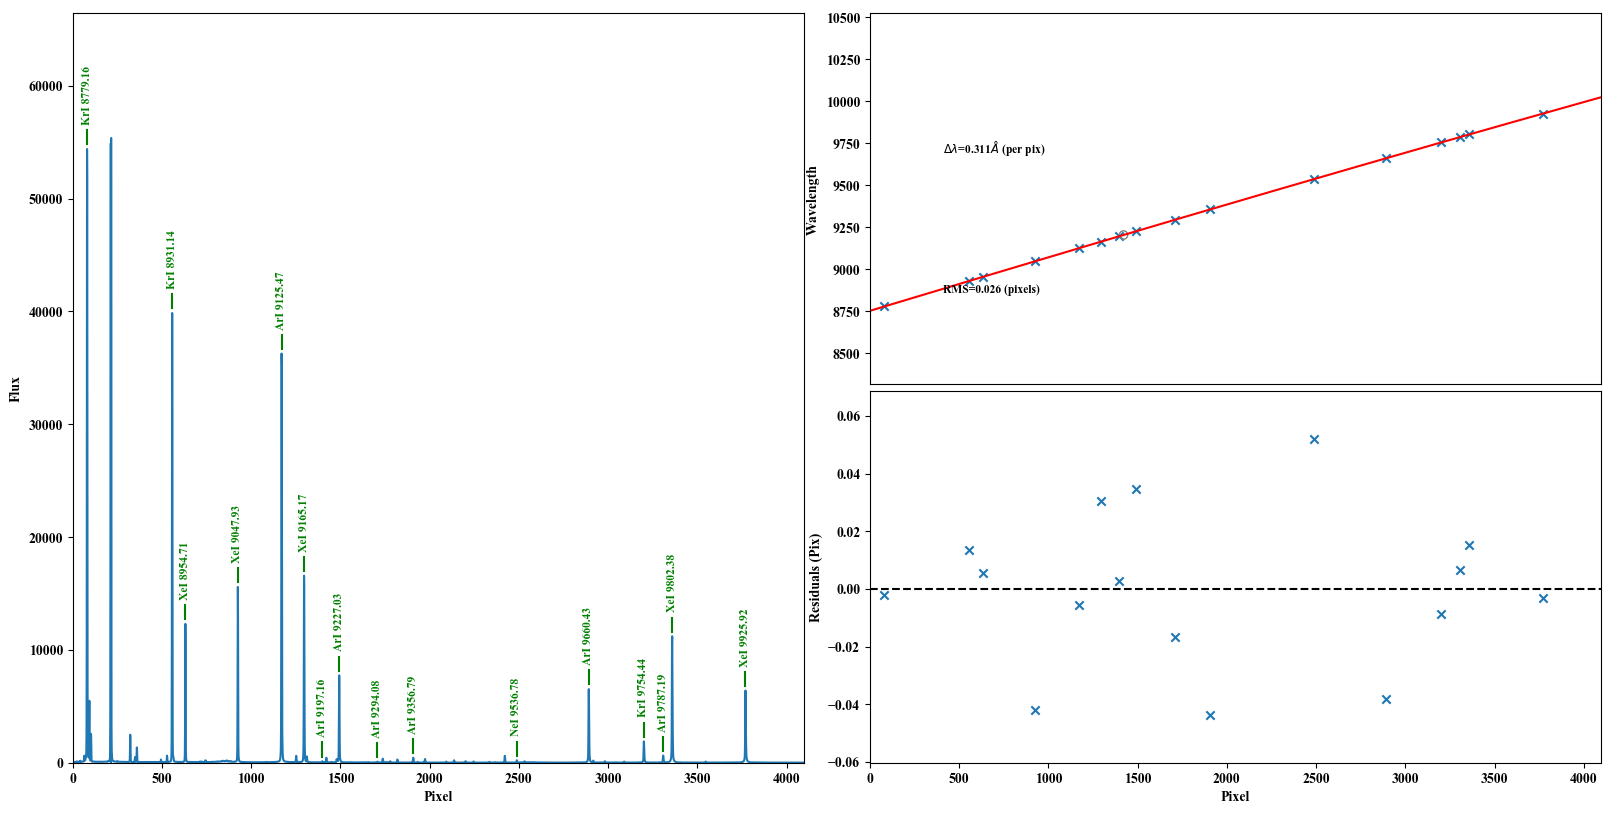

In [34]:
qa.arc_fit_qa(wv_calib['0'])

In [35]:
jdict = ltu.jsonify(wv_calib)

In [38]:
outfile = os.path.join(os.getenv('PYPEIT_DEV'), 'dev_algorithms/wavelengths/template_files/Keck_DEIMOS/1200G', 
                        'MasterWaveCalib_A_1_07c.json')

In [39]:
ltu.savejson(outfile, jdict)